Objective: Sentiment Classification
Reviews categorized into positive, negative, or neutral sentiments, evaluated using accuracy


Literature Review

BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (Devlin et al., 2019)
BERT (Bidirectional Encoder Representations from Transformers) revolutionized NLP by introducing deep bidirectional context understanding. BERT’s core principles, useful for classification tasks. Unlike previous models, it reads text both left-to-right and right-to-left simultaneously for better comprehension.
BERT’s contextual embeddings significantly improve sentiment classification.
Fine-tuning BERT on sentiment datasets achieves state-of-the-art accuracy.
Pre-trained model: “bert-base-uncased” is commonly used for text classification tasks.


DistilBERT: a distilled version of BERT: smaller, faster, cheaper and lighter (Sanh et al., 2019)
Lighter and faster version of BERT trained using knowledge distillation. Retains 97% of BERT’s performance while being 60% smaller and 2× faster.
Key Techniques:
Removes Next Sentence Prediction (NSP).
Reduces the number of layers from 12 → 6 while maintaining BERT-like embeddings.
Trained to mimic BERT’s outputs while using fewer parameters.
Much faster inference than BERT and RoBERTa. Requires less computational power (can run on CPUs efficiently). Great for real-time sentiment classification in production environments.


Long Short-Term Memory (LSTM) Networks: a type of Recurrent Neural Network (RNN) designed to handle long-term dependencies in sequential data. (Ralf C. Staudemeyer, Eric Rothstein Morris 2019) 
LSTMs use gates (input, forget, output) to control information flow, solving vanishing gradient problems.
Forget Gate: Decides which past information to discard.
Input Gate: Determines which new information to store.
Output Gate: Decides what to output for the next state.
Impact on Sentiment Classification:
Captures word dependencies in long reviews (e.g., “not great at all” vs. “great”).
Better context retention than traditional RNNs.
Helps classify sequential text effectively.


Logistic Regression: a statistical model used for binary classification (positive vs. negative sentiment) (Husna et al., 2019; Cox, 1958)
Uses sigmoid function to output probabilities between 0 and 1.
Advantages in Sentiment Analysis:
Interpretable – Coefficients indicate which words influence sentiment.
Computationally efficient – Faster training than deep learning models.
Works well with TF-IDF – Can effectively classify sentiment without needing deep networks.
TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection (corpus). Converts raw text into numerical feature vectors for machine learning models. Captures important words related to sentiment (e.g., “great”, “terrible”).

BERT took too much time and finally I compared Logistic Regression and LSTM models

In [1]:
#load data and preprocess for test two models on small set of data
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Final Project/Amazon_review.csv"
df = pd.read_csv(file_path, nrows=1000)

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   

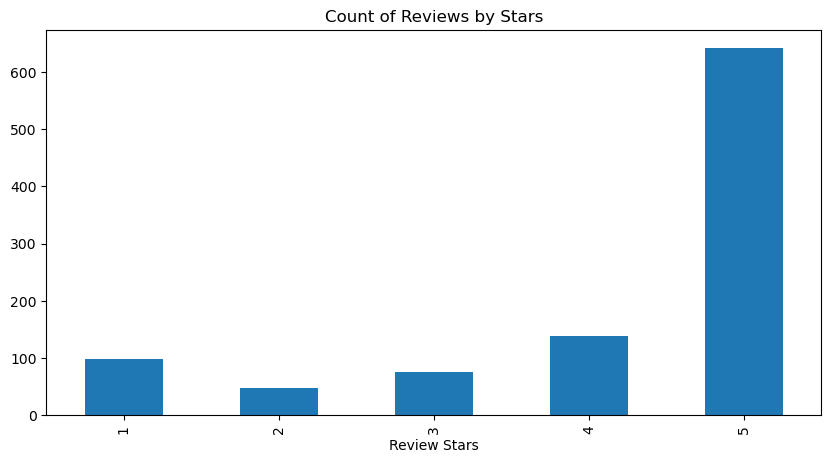

In [13]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert Score into Sentiment Labels
def label_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

df["Sentiment"] = df["Score"].apply(label_sentiment)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Sentiment"], test_size=0.2, random_state=42)


In [17]:
#TF-IDF + Logistic Regression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predictions & Evaluation
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr, target_names=["Negative", "Neutral", "Positive"]))


Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       1.00      0.04      0.08        25
     Neutral       0.00      0.00      0.00        11
    Positive       0.82      1.00      0.90       164

    accuracy                           0.82       200
   macro avg       0.61      0.35      0.33       200
weighted avg       0.80      0.82      0.75       200



/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
#LSTM
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenization
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Convert labels to tensors
label_encoder = LabelEncoder()
y_train_enc = torch.tensor(label_encoder.fit_transform(y_train), dtype=torch.long)
y_test_enc = torch.tensor(label_encoder.transform(y_test), dtype=torch.long)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(torch.tensor(X_train_pad, dtype=torch.long), y_train_enc)
test_dataset = TensorDataset(torch.tensor(X_test_pad, dtype=torch.long), y_test_enc)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define LSTM Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        return self.fc(hidden[-1])

# Initialize model
vocab_size = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)
model = SentimentLSTM(vocab_size)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train LSTM Model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Evaluate LSTM Model
model.eval()
y_pred_lstm = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_lstm.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

print("LSTM Performance:")
print(classification_report(y_true, y_pred_lstm, target_names=["Negative", "Neutral", "Positive"]))


Epoch 1/5, Loss: 22.3219
Epoch 2/5, Loss: 16.6920
Epoch 3/5, Loss: 15.0951
Epoch 4/5, Loss: 12.9535
Epoch 5/5, Loss: 10.0886
LSTM Performance:
              precision    recall  f1-score   support

    Negative       0.24      0.16      0.19        25
     Neutral       0.50      0.09      0.15        11
    Positive       0.83      0.92      0.88       164

    accuracy                           0.78       200
   macro avg       0.52      0.39      0.41       200
weighted avg       0.74      0.78      0.75       200



In [5]:
# DistilBERT fine-tuning
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["Text"], padding="max_length", truncation=True, max_length=512)

# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.map(tokenize_function, batched=True)

# Rename "Sentiment" column to "labels" for compatibility with Trainer
dataset = dataset.rename_column("Sentiment", "labels")

# Train-Test Split
dataset = dataset.train_test_split(test_size=0.2)

# Load DistilBERT model for classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=500,
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
)

# Train DistilBERT Model
trainer.train()

# Evaluate DistilBERT Model
results = trainer.evaluate()
results


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.369913
2,No log,0.355899
3,No log,0.328512


{'eval_loss': 0.32851243019104004,
 'eval_runtime': 4.7309,
 'eval_samples_per_second': 42.276,
 'eval_steps_per_second': 5.284,
 'epoch': 3.0}

In [9]:

# Make predictions on the test dataset
predictions = trainer.predict(dataset["test"])

# Convert logits to predicted class labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = dataset["test"]["labels"]

# Generate classification report
eval_report = classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"])
print("Classification Report:\n", eval_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        34
     Neutral       0.00      0.00      0.00        19
    Positive       0.73      1.00      0.85       147

    accuracy                           0.73       200
   macro avg       0.24      0.33      0.28       200
weighted avg       0.54      0.73      0.62       200



/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
